In [ ]:
import pandas as pd

data = {
    'I': [96, 100, 104, 120, 120, 120, 120, 126, 130, 134, 134, 136],
    'II': [76, 82, 82, 84, 88, 96, 100, 102, 104, 110, 118, 120],
    'III': [82, 90, 81, 132, 121, 100, 105, 120, 105, 120, 130, 134]
}

df = pd.DataFrame(data)
print(df.head())

     I  II  III
0   96  76   82
1  100  82   90
2  104  82   81
3  120  84  132
4  120  88  121


### Проведем тест Розенбаума для первой и второй выборки и определим стат значимые различия.

In [ ]:
def rosenbaum_test(x, y):
    S1 = sum(xi > max(y) for xi in x)
    S2 = sum(yi < min(x) for yi in y)
    return S1 + S2

Q = rosenbaum_test(df['I'], df['II'])
Q_critical = 7

print(f"Q = {Q}, Критическое Q = {Q_critical}")
if Q >= Q_critical:
    print("Вывод: различия значимы (p < 0.05)")
else:
    print("Вывод: различия незначимы (p > 0.05)")

Q = 10, Критическое Q = 7
Вывод: различия значимы (p < 0.05)


### **Гипотезы:**
- H0: Выборки из одного распределения.
- H1: Выборки сдвинуты относительно друг друга.

### Заключение:
Так как Q = 10 > Qкрит, значит отвергаем H0
Вывод: Выборки I и II имеют статистически значимые различия



---



## **Критерий Краскела-Уоллиса**  
- **Гипотезы**:  
  - H₀: Все группы имеют одинаковые распределения.  
  - H₁: Хотя бы одна группа отличается.  
- **Результат**: H = 9.911, p = 0.0070.  
- **Вывод**: Различия между группами значимы (p < 0.05).  

In [ ]:
from scipy.stats import kruskal

H_stat, p_value = kruskal(df['I'], df['II'], df['III'])

print(f"Результаты теста Краскела-Уоллиса:")
print(f"H-статистика = {H_stat:.3f}, p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Вывод: Существуют статистически значимые различия между группами (p < 0.05)")
else:
    print("Вывод: Статистически значимых различий между группами не обнаружено (p > 0.05)")

Результаты теста Краскела-Уоллиса:
H-статистика = 9.911, p-value = 0.0070
Вывод: Существуют статистически значимые различия между группами (p < 0.05)


## **Критерий Вилкоксона (I vs II)**

**Гипотезы**:  
- H₀: Медиана разностей между I и II равна нулю.  
- H₁: Медиана разностей не равна нулю.  

**Результаты**:  
- W = 0.000, p = 0.0005  
- Все значения в I строго больше, чем в II.  

**Результат**: Все значения в группе I строго больше, чем в группе II (W = 0, p < 0.001).  

**Вывод**:  
Отвергаем H₀ (p < 0.05). Существует статистически значимый положительный сдвиг от II к I.  

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(df['I'], df['II'])

print(f"Статистика: {stat:.3f}, p-value: {p:.4f}")

alpha = 0.05
if p < alpha:
    print("Отвергаем H₀: есть статистически значимый сдвиг")
else:
    print("Не отвергаем H₀: сдвиг незначим")

Статистика: 0.000, p-value: 0.0005
Отвергаем H₀: есть статистически значимый сдвиг


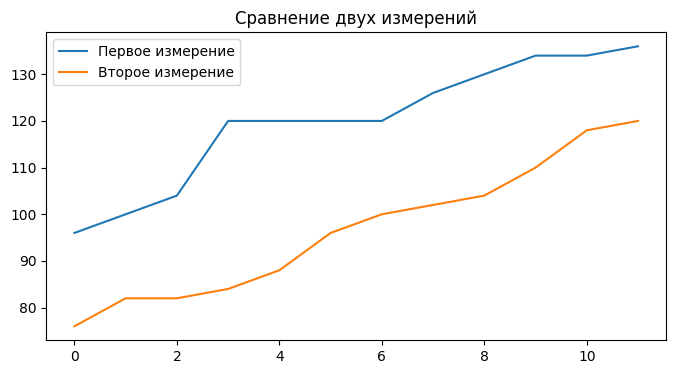

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(df['I'], label='Первое измерение')
plt.plot(df['II'], label='Второе измерение')
plt.title("Сравнение двух измерений")
plt.legend()
plt.show()

### **Критерий Пейджа (n=12, k=3)**

**Расчёт**:
- Суммы рангов:
  - I (j=1): 34.0  
  - II (j=2): 13.0  
  - III (j=3): 25.0  

**Критические значения** (из таблицы):
- α=0.05: 153  
- α=0.01: 156  
- α=0.001: 160  

**Результат**:  
135.0 < 153 → **тренд незначим** (p > 0.05)

**Вывод**:  
Нет статистически значимого монотонного тренда между замерами I, II и III.

In [ ]:
ranks = df.rank(axis=1, method='average')
print("Ранги:")
print(ranks.head())

Ранги:
     I   II  III
0  3.0  1.0  2.0
1  3.0  1.0  2.0
2  3.0  2.0  1.0
3  2.0  1.0  3.0
4  2.0  1.0  3.0


In [ ]:
R = ranks.sum()
print("\nСуммы рангов:")
print(R)


Суммы рангов:
I      34.0
II     13.0
III    25.0
dtype: float64


In [ ]:
import numpy as np

n = len(df)
k = 3

weights = np.array([1, 2, 3])
L = np.dot(R.values, weights)

print(f"\nСтатистика Пейджа: L = {L}")


Статистика Пейджа: L = 135.0


In [ ]:
L_crit_05 = 153
if L >= L_crit_05:
    print(f"L = {L} >= {L_crit_05}: тренд значим (p < 0.05)")
else:
    print(f"L = {L} < {L_crit_05}: тренд незначим")

L = 135.0 < 153: тренд незначим
